# Functionality of the Code
This is the vanilla coda that is executed without any additional layers other than Convolution. 

In this code, I'm using just, Conv2D, Max Pooling and 1x1. 

# Importing the required libraries and required modules


In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

import cv2

import numpy as np
import matplotlib.pyplot as plt

### Loading the MNIST Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

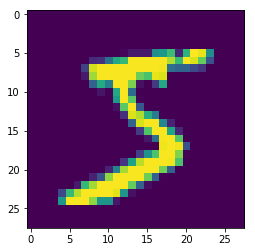

In [4]:
plt.imshow(x_train[0])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), border_mode='same')) # 28
model.add(Convolution2D(64, (3, 3), activation='relu')) # 26 
model.add(Convolution2D(32, 1, activation='relu')) # 26
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 9
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 250us/step - loss: 0.1568 - acc: 0.9501 - val_loss: 0.0463 - val_acc: 0.9839
Epoch 2/30
60000/60000 [==============================] - 12s 205us/step - loss: 0.0512 - acc: 0.9836 - val_loss: 0.0419 - val_acc: 0.9865
Epoch 3/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.0391 - acc: 0.9877 - val_loss: 0.0304 - val_acc: 0.9900
Epoch 4/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.0338 - val_acc: 0.9893
Epoch 5/30
60000/60000 [==============================] - 12s 204us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0360 - val_acc: 0.9900
Epoch 6/30
60000/60000 [==============================] - 14s 231us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0342 - val_acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 13s 221us/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [14]:
print(score)

[0.0467814007031584, 0.9912]
